In [1]:
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Practical Guide to PCA visualization in Python

This guide illustrates how to visualize the results of a PCA analysis

There is a sister notebook to this one in R here: [](pca-visualization-in-r.ipynb)

# Dataset

In [2]:
iris = datasets.load_iris()

# columns = variables
# rows = observations
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Run a PCA decomposition

In [3]:
pca_res = PCA()
pca_x = pca_res.fit_transform(iris.data)
component_names = list(map(lambda i: 'PC'+str(i+1), range(pca_x.shape[1])))
pca_x.shape

(150, 4)

# Scatter plot of observations

Observations are projected on the first 2 components

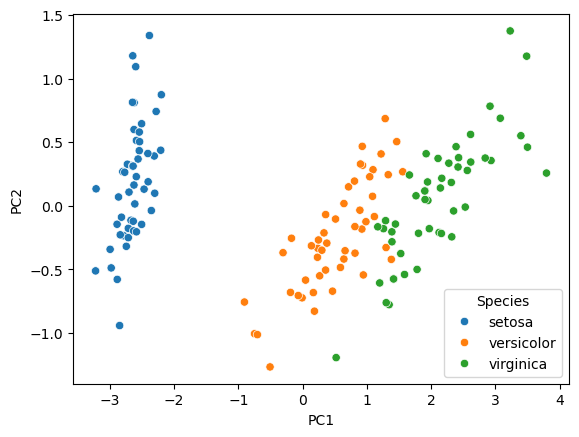

In [4]:
species_names = list(map(lambda k: iris.target_names[k], iris.target))
df = pd.DataFrame(pca_x, columns=component_names)
df['Species'] = species_names
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Species')
plt.show()

# Explained variance (eigenvalues)

The amount of variance explained by each of the components

In [5]:
pca_res.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

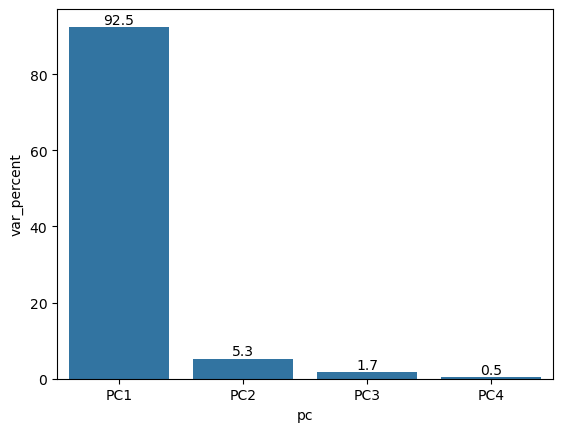

In [6]:
df = pd.DataFrame({'var_percent': 100*pca_res.explained_variance_ratio_, 'pc': component_names})
ax = sns.barplot(data=df, x='pc', y='var_percent')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

# Cumulative variance

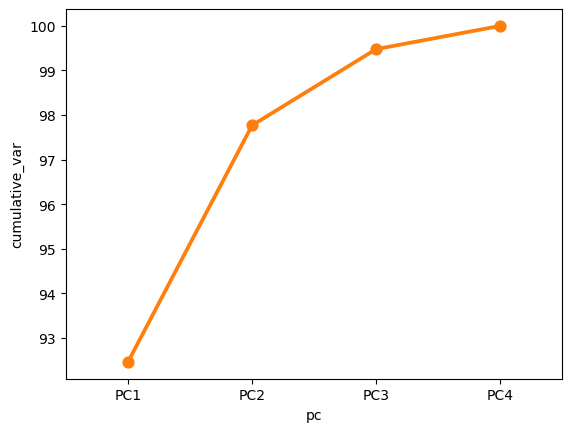

In [7]:
df = pd.DataFrame({'var_percent': 100*pca_res.explained_variance_ratio_, 'pc': component_names})
df['cumulative_var'] = np.cumsum(df['var_percent'])
sns.lineplot(data=df, x='pc', y='cumulative_var')
sns.pointplot(data=df, x='pc', y='cumulative_var')
plt.show()

# Component rotations (eigenvectors)

Principal axes in feature space, representing the directions of maximum variance in the data

In [8]:
# columns = variables
# rows = components
pca_res.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

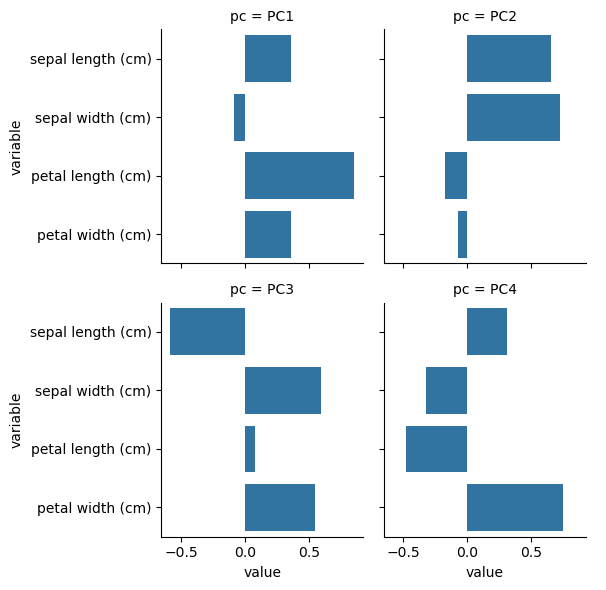

In [9]:
df = pd.DataFrame(pca_res.components_, columns=iris.feature_names)
df['pc'] = component_names
df = df.melt(id_vars=['pc'])
sns.catplot(data=df, x='value', y='variable', col='pc', kind='bar', col_wrap=2, height=3)
plt.show()

# Component loadings

Eigenvectors scaled by the square root of the eigenvalues

In [10]:
sdev = np.sqrt(pca_res.explained_variance_)
var_cor = pca_res.components_.T * sdev

# columns = components
# rows = variables
var_cor

array([[ 0.743108  ,  0.32344628, -0.16277024,  0.04870686],
       [-0.17380102,  0.35968937,  0.16721151, -0.04936083],
       [ 1.76154511, -0.08540619,  0.02132015, -0.07408051],
       [ 0.73673893, -0.03718318,  0.15264701,  0.11635429]])

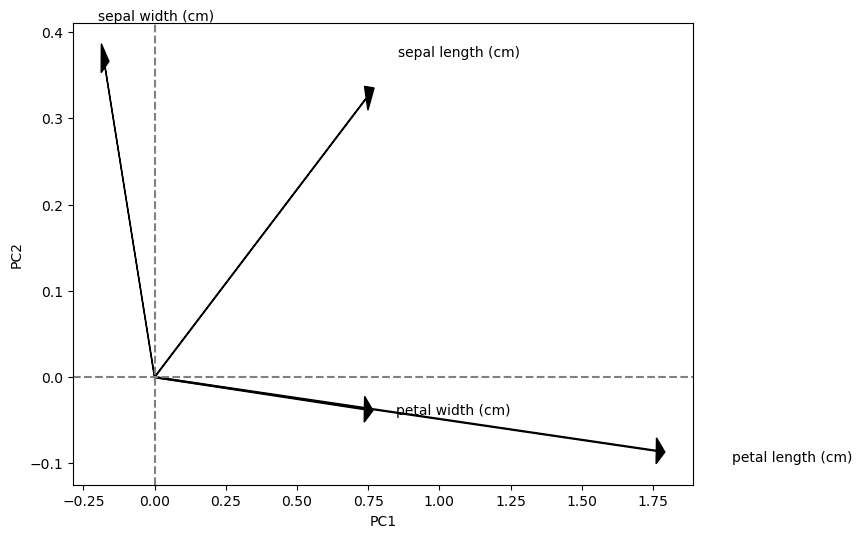

In [11]:
plt.figure(figsize=(8,6))

for i, r in enumerate(var_cor):
    plt.arrow(0, 0, r[0], r[1],head_width=0.03, head_length=0.03, color='black')
    plt.text(r[0] * 1.15, r[1] * 1.15, iris.feature_names[i], fontsize=10)

plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('PC1', fontsize=10)
plt.ylabel('PC2', fontsize=10)
plt.show()

# Component contributions

Measures the contribution of the variables to each component

In [12]:
var_cos2 = var_cor ** 2
var_contrib = (100 * var_cos2) / var_cos2.sum(axis=0)

# columns = components
# rows = variables
var_contrib

array([[13.06002687, 43.11088146, 33.87587478,  9.95321689],
       [ 0.71440554, 53.31357208, 35.74973608, 10.2222863 ],
       [73.38845271,  3.00580802,  0.58119393, 23.02454534],
       [12.83711488,  0.56973844, 29.79319522, 56.79995147]])

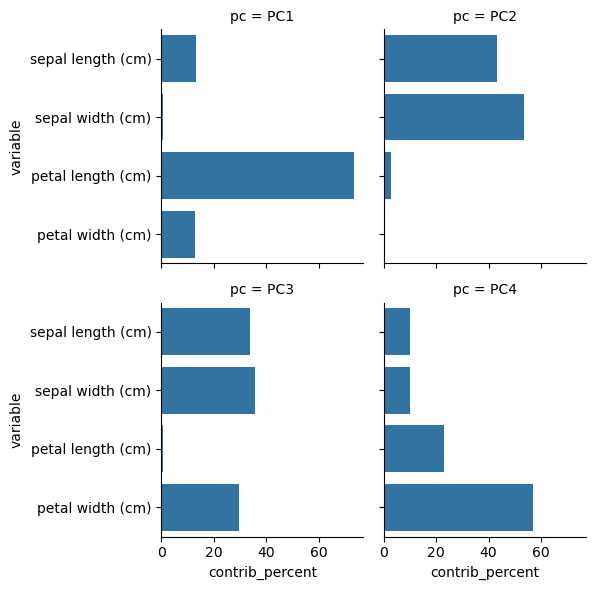

In [13]:
df = pd.DataFrame(var_contrib.T, columns=iris.feature_names)
df['pc'] = component_names
df = df.melt(id_vars=['pc'], value_name='contrib_percent')
sns.catplot(data=df, x='contrib_percent', y='variable', col='pc', kind='bar', col_wrap=2, height=3)
plt.show()

# Correlation of all variables

Compare the correlations with the components found by PCA

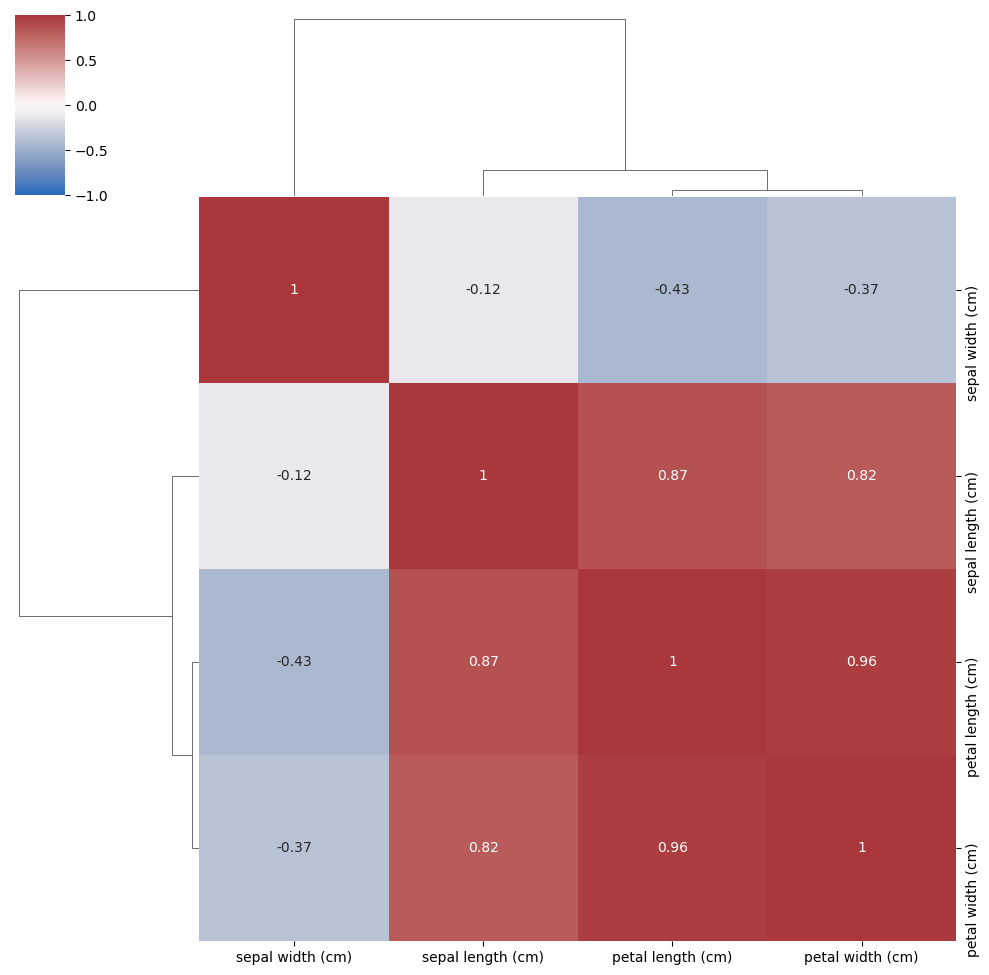

In [14]:
corr = np.corrcoef(iris.data.T)
sns.clustermap(corr, vmin=-1, vmax=1, cmap='vlag', annot=True, xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.show()